In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('content/drive/MyDrive/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('content/drive/MyDrive/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
!pip install -q efficientnet

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
import efficientnet.tfkeras as efn

In [ ]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [ ]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])

model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])


16809984/16804768 [==============================] - 0s 0us/step


In [ ]:

history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)


Epoch 1/40
92/92 [==============================] - 71s 774ms/step - loss: 1.0171 - acc: 0.6527 - val_loss: 1.1717 - val_acc: 0.5595 - lr: 1.0000e-04
Epoch 2/40
92/92 [==============================] - 54s 582ms/step - loss: 0.7417 - acc: 0.7318 - val_loss: 1.0159 - val_acc: 0.6320 - lr: 1.0000e-04
Epoch 3/40
92/92 [==============================] - 52s 571ms/step - loss: 0.6480 - acc: 0.7608 - val_loss: 0.8744 - val_acc: 0.6977 - lr: 1.0000e-04
Epoch 4/40
92/92 [==============================] - 53s 575ms/step - loss: 0.5936 - acc: 0.7779 - val_loss: 0.7011 - val_acc: 0.7291 - lr: 1.0000e-04
Epoch 5/40
92/92 [==============================] - 53s 572ms/step - loss: 0.5639 - acc: 0.7871 - val_loss: 0.5862 - val_acc: 0.7620 - lr: 1.0000e-04
Epoch 6/40
92/92 [==============================] - 53s 578ms/step - loss: 0.5238 - acc: 0.8011 - val_loss: 0.5860 - val_acc: 0.7729 - lr: 1.0000e-04
Epoch 7/40
92/92 [==============================] - 52s 568ms/step - loss: 0.4714 - acc: 0.8226 - va

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

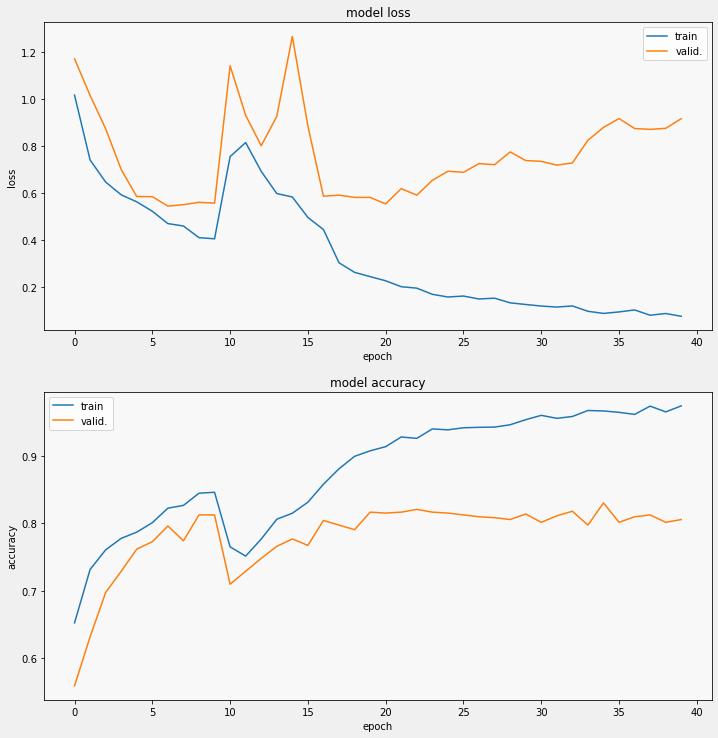

In [ ]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['acc'],
    history.history['val_acc'],
    'accuracy', 212)

In [ ]:
# save the trained model to use
model.save('modelDR.h5')

In [ ]:
# get class names associated with dataset images
categories = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
print(categories)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
import numpy as np

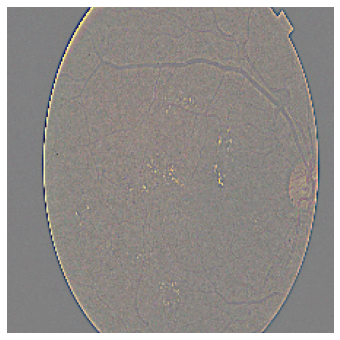

Predicted case -> Moderate


In [ ]:
# Testing the model using sample image
image_path = "content/drive/MyDrive/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Moderate/000c1434d8d7.png"
image = tf.keras.preprocessing.image.load_img(image_path)
image = image.resize((224,224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = image_array / 255.0
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# Use model to predict the sample image
pred = model.predict(scaled_img)

# show the output of predicted image
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)